In [402]:
import pandas as pd
import numpy as np

In [403]:
hotels = pd.read_csv('hotels.csv')
hotels.head()

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,tags,days_since_review,lat,lng
0,Stratton Street Mayfair Westminster Borough Lo...,581,2/19/2016,8.4,The May Fair Hotel,United Kingdom,Leaving,3,1994,Staff were amazing,4,7,10.0,"[' Leisure trip ', ' Couple ', ' Studio Suite ...",531 day,51.507894,-0.143671
1,130 134 Southampton Row Camden London WC1B 5AF...,299,1/12/2017,8.3,Mercure London Bloomsbury Hotel,United Kingdom,poor breakfast,3,1361,location,2,14,6.3,"[' Business trip ', ' Couple ', ' Standard Dou...",203 day,51.521009,-0.123097
2,151 bis Rue de Rennes 6th arr 75006 Paris France,32,10/18/2016,8.9,Legend Saint Germain by Elegancia,China,No kettle in room,6,406,No Positive,0,14,7.5,"[' Leisure trip ', ' Solo traveler ', ' Modern...",289 day,48.845377,2.325643
3,216 Avenue Jean Jaures 19th arr 75019 Paris Fr...,34,9/22/2015,7.5,Mercure Paris 19 Philharmonie La Villette,United Kingdom,No Negative,0,607,Friendly staff quiet comfortable room spotles...,11,8,10.0,"[' Leisure trip ', ' Solo traveler ', ' Standa...",681 day,48.888697,2.394540
4,Molenwerf 1 1014 AG Amsterdam Netherlands,914,3/5/2016,8.5,Golden Tulip Amsterdam West,Poland,Torn sheets,4,7586,The staff was very friendly and helpful Break...,20,10,9.6,"[' Business trip ', ' Couple ', ' Standard Dou...",516 day,52.385601,4.847060


In [404]:

isnull_df = hotels.isnull().mean()*100
print(isnull_df.sort_values(ascending=False))

lng                                           0.63288
lat                                           0.63288
positive_review                               0.00000
days_since_review                             0.00000
tags                                          0.00000
reviewer_score                                0.00000
total_number_of_reviews_reviewer_has_given    0.00000
review_total_positive_word_counts             0.00000
hotel_address                                 0.00000
additional_number_of_scoring                  0.00000
review_total_negative_word_counts             0.00000
negative_review                               0.00000
reviewer_nationality                          0.00000
hotel_name                                    0.00000
average_score                                 0.00000
review_date                                   0.00000
total_number_of_reviews                       0.00000
dtype: float64


In [405]:
hotels.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386803 entries, 0 to 386802
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               386803 non-null  object 
 1   additional_number_of_scoring                386803 non-null  int64  
 2   review_date                                 386803 non-null  object 
 3   average_score                               386803 non-null  float64
 4   hotel_name                                  386803 non-null  object 
 5   reviewer_nationality                        386803 non-null  object 
 6   negative_review                             386803 non-null  object 
 7   review_total_negative_word_counts           386803 non-null  int64  
 8   total_number_of_reviews                     386803 non-null  int64  
 9   positive_review                             386803 non-null  object 
 

In [406]:
hotels_x = hotels.drop(columns=['reviewer_score'], axis=1)
hotels_y = hotels['reviewer_score']

In [407]:
from sklearn.model_selection import train_test_split  

In [408]:
hotels_x_tr, hotels_x_te, hotels_y_tr, hotels_y_te = train_test_split(hotels_x, hotels_y, test_size=0.25, random_state=42)

In [409]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
      
regr = RandomForestRegressor(n_estimators=100)  
      

regr.fit(hotels_x_tr, hotels_y_tr)  

y_pred = regr.predict(hotels_x_te)

ValueError: could not convert string to float: 'Pla a de Llevant s n Sant Mart 08019 Barcelona Spain'

In [ ]:
print('MAPE:', metrics.mean_absolute_percentage_error(hotels_y_te, y_pred))

In [45]:
hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386803 entries, 0 to 386802
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               386803 non-null  object 
 1   additional_number_of_scoring                386803 non-null  int64  
 2   review_date                                 386803 non-null  object 
 3   average_score                               386803 non-null  float64
 4   hotel_name                                  386803 non-null  object 
 5   reviewer_nationality                        386803 non-null  object 
 6   negative_review                             386803 non-null  object 
 7   review_total_negative_word_counts           386803 non-null  int64  
 8   total_number_of_reviews                     386803 non-null  int64  
 9   positive_review                             386803 non-null  object 
 

In [410]:
hotels_obj_cleaned = hotels.drop(columns=['hotel_address',
                                             'review_date',
                                             'hotel_name',
                                             'reviewer_nationality',
                                             'negative_review',
                                             'positive_review',
                                             'tags',
                                             'days_since_review'],
                                 axis=1)

In [411]:
hotels_obj_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386803 entries, 0 to 386802
Data columns (total 9 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   additional_number_of_scoring                386803 non-null  int64  
 1   average_score                               386803 non-null  float64
 2   review_total_negative_word_counts           386803 non-null  int64  
 3   total_number_of_reviews                     386803 non-null  int64  
 4   review_total_positive_word_counts           386803 non-null  int64  
 5   total_number_of_reviews_reviewer_has_given  386803 non-null  int64  
 6   reviewer_score                              386803 non-null  float64
 7   lat                                         384355 non-null  float64
 8   lng                                         384355 non-null  float64
dtypes: float64(4), int64(5)
memory usage: 26.6 MB


In [412]:
values = {'lat' : hotels_obj_cleaned['lat'].mean(),
          'lng' : hotels_obj_cleaned['lng'].mean()}

hotels_obj_na_cleaned = hotels_obj_cleaned.fillna(value=values)

In [413]:
hotels_obj_na_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386803 entries, 0 to 386802
Data columns (total 9 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   additional_number_of_scoring                386803 non-null  int64  
 1   average_score                               386803 non-null  float64
 2   review_total_negative_word_counts           386803 non-null  int64  
 3   total_number_of_reviews                     386803 non-null  int64  
 4   review_total_positive_word_counts           386803 non-null  int64  
 5   total_number_of_reviews_reviewer_has_given  386803 non-null  int64  
 6   reviewer_score                              386803 non-null  float64
 7   lat                                         386803 non-null  float64
 8   lng                                         386803 non-null  float64
dtypes: float64(4), int64(5)
memory usage: 26.6 MB


In [414]:
hotels_x = hotels_obj_na_cleaned.drop(columns=['reviewer_score'], axis=1)
hotels_y = hotels_obj_na_cleaned['reviewer_score']

hotels_x_tr, hotels_x_te, hotels_y_tr, hotels_y_te = train_test_split(hotels_x, hotels_y, test_size=0.25, random_state=42)

regr = RandomForestRegressor(n_estimators=100)  
      
regr.fit(hotels_x_tr, hotels_y_tr)  


RandomForestRegressor()

In [415]:
y_pred = regr.predict(hotels_x_te)

In [416]:
print('MAPE:', metrics.mean_absolute_percentage_error(hotels_y_te, y_pred))

MAPE: 0.14146868480717317


#### 4.1 Filling data num_cols and cat_cols

In [62]:
hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386803 entries, 0 to 386802
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               386803 non-null  object 
 1   additional_number_of_scoring                386803 non-null  int64  
 2   review_date                                 386803 non-null  object 
 3   average_score                               386803 non-null  float64
 4   hotel_name                                  386803 non-null  object 
 5   reviewer_nationality                        386803 non-null  object 
 6   negative_review                             386803 non-null  object 
 7   review_total_negative_word_counts           386803 non-null  int64  
 8   total_number_of_reviews                     386803 non-null  int64  
 9   positive_review                             386803 non-null  object 
 

In [3]:
import pandas as pd
import numpy as np

hotels = pd.read_csv('hotels.csv')

In [4]:
hotels.head()

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,tags,days_since_review,lat,lng
0,Stratton Street Mayfair Westminster Borough Lo...,581,2/19/2016,8.4,The May Fair Hotel,United Kingdom,Leaving,3,1994,Staff were amazing,4,7,10.0,"[' Leisure trip ', ' Couple ', ' Studio Suite ...",531 day,51.507894,-0.143671
1,130 134 Southampton Row Camden London WC1B 5AF...,299,1/12/2017,8.3,Mercure London Bloomsbury Hotel,United Kingdom,poor breakfast,3,1361,location,2,14,6.3,"[' Business trip ', ' Couple ', ' Standard Dou...",203 day,51.521009,-0.123097
2,151 bis Rue de Rennes 6th arr 75006 Paris France,32,10/18/2016,8.9,Legend Saint Germain by Elegancia,China,No kettle in room,6,406,No Positive,0,14,7.5,"[' Leisure trip ', ' Solo traveler ', ' Modern...",289 day,48.845377,2.325643
3,216 Avenue Jean Jaures 19th arr 75019 Paris Fr...,34,9/22/2015,7.5,Mercure Paris 19 Philharmonie La Villette,United Kingdom,No Negative,0,607,Friendly staff quiet comfortable room spotles...,11,8,10.0,"[' Leisure trip ', ' Solo traveler ', ' Standa...",681 day,48.888697,2.394540
4,Molenwerf 1 1014 AG Amsterdam Netherlands,914,3/5/2016,8.5,Golden Tulip Amsterdam West,Poland,Torn sheets,4,7586,The staff was very friendly and helpful Break...,20,10,9.6,"[' Business trip ', ' Couple ', ' Standard Dou...",516 day,52.385601,4.847060


In [5]:
def get_days(days_string) -> int:
    
    """ The function extracts interger value from string

    Args:
        days_string (object): from DataFrame

    Returns:
        int: number of days
    """
    days = days_string.split(sep=' ')[0]
    
    return int(days)

hotels['days_since_review'] = hotels['days_since_review'].apply(get_days)


In [6]:
hotels['days_since_review'] = hotels['days_since_review'].astype('int32')

In [7]:

trip_type = ['Leisure trip',
             'Business trip']

family_type =['Couple',
              'Group',
              'Solo traveler',
              'Family with older children',
              'Family with young children']


def split_tags(tag):
    
    
    def get_nights(nights_string):
        
        nights_lilst = nights_string.split(sep=' ')
        
        return int(nights_lilst[1])
    
    
    draft_list = tag.split(sep=" ', ' ")
    output_list = [np.nan for i in range(5)]
    
    for item in draft_list:
        
        #checking trip type
        for sub_item in trip_type:
            
            if sub_item in item:
                output_list[1] = sub_item
        
        #checking family type
        for sub_item in family_type:
            
            if sub_item in item:
                output_list[2] = sub_item
        
            
        if 'With a pet' in item:
            output_list[0] = 'With a pet'
        
        if 'Submitted from a mobile device' in item:
            output_list[4] = 'Submitted from a mobile device'
        
        
        if 'Stayed' in item:
            output_list[3] = get_nights(item)
 
    return(output_list)

hotels['pets'] = hotels['tags'].apply(lambda x: 0 if split_tags(x)[0] is np.nan else 1)
hotels['trip_type'] = hotels['tags'].apply(lambda x: split_tags(x)[1])
hotels['family_type'] = hotels['tags'].apply(lambda x: split_tags(x)[2])
hotels['nights'] = hotels['tags'].apply(lambda x: split_tags(x)[3])
hotels['mobily_used'] = hotels['tags'].apply(lambda x: 0 if split_tags(x)[4] is np.nan else 1)


In [8]:
hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386803 entries, 0 to 386802
Data columns (total 22 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               386803 non-null  object 
 1   additional_number_of_scoring                386803 non-null  int64  
 2   review_date                                 386803 non-null  object 
 3   average_score                               386803 non-null  float64
 4   hotel_name                                  386803 non-null  object 
 5   reviewer_nationality                        386803 non-null  object 
 6   negative_review                             386803 non-null  object 
 7   review_total_negative_word_counts           386803 non-null  int64  
 8   total_number_of_reviews                     386803 non-null  int64  
 9   positive_review                             386803 non-null  object 
 

In [9]:
isnull_df = hotels.isnull().mean()*100
print(isnull_df.sort_values(ascending=False))

trip_type                                     2.900960
lng                                           0.632880
lat                                           0.632880
family_type                                   0.421403
nights                                        0.037745
hotel_address                                 0.000000
additional_number_of_scoring                  0.000000
pets                                          0.000000
days_since_review                             0.000000
tags                                          0.000000
reviewer_score                                0.000000
total_number_of_reviews_reviewer_has_given    0.000000
review_total_positive_word_counts             0.000000
positive_review                               0.000000
total_number_of_reviews                       0.000000
review_total_negative_word_counts             0.000000
negative_review                               0.000000
reviewer_nationality                          0.000000
hotel_name

In [10]:
values = {'lat' : hotels['lat'].mean(),
          'lng' : hotels['lng'].mean(),
          'nights' : hotels['nights'].mean()}

hotels = hotels.fillna(value=values)

In [11]:
hotels_cleaned = hotels.drop(columns=['hotel_address',
                                             'review_date',
                                             'hotel_name',
                                             'negative_review',
                                             'positive_review',
                                             'tags',
                                             'days_since_review',
                                             'pets',
                                             'family_type',
                                             'trip_type'],
                                 axis=1)

In [12]:
hotels_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386803 entries, 0 to 386802
Data columns (total 12 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   additional_number_of_scoring                386803 non-null  int64  
 1   average_score                               386803 non-null  float64
 2   reviewer_nationality                        386803 non-null  object 
 3   review_total_negative_word_counts           386803 non-null  int64  
 4   total_number_of_reviews                     386803 non-null  int64  
 5   review_total_positive_word_counts           386803 non-null  int64  
 6   total_number_of_reviews_reviewer_has_given  386803 non-null  int64  
 7   reviewer_score                              386803 non-null  float64
 8   lat                                         386803 non-null  float64
 9   lng                                         386803 non-null  float64
 

In [13]:
hotels_cleaned.head()

,additional_number_of_scoring,average_score,reviewer_nationality,review_total_negative_word_counts,total_number_of_reviews,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,lat,lng,nights,mobily_used
0,581,8.4,United Kingdom,3,1994,4,7,10.0,51.507894,-0.143671,2.0,1
1,299,8.3,United Kingdom,3,1361,2,14,6.3,51.521009,-0.123097,1.0,0
2,32,8.9,China,6,406,0,14,7.5,48.845377,2.325643,3.0,1
3,34,7.5,United Kingdom,0,607,11,8,10.0,48.888697,2.394540,1.0,0
4,914,8.5,Poland,4,7586,20,10,9.6,52.385601,4.847060,6.0,0


In [14]:
num_cols =['total_number_of_reviews',
           'review_total_negative_word_counts',
           'review_total_positive_word_counts',
           'total_number_of_reviews_reviewer_has_given',
           'nights',
           'additional_number_of_scoring']

cat_cols = ['average_score',
            'reviewer_nationality',
            'lat',
            'lng',
            'mobily_used']

cat_cols_1 = ['average_score',
            'additional_number_of_scoring',
            'lat',
            'lng',
            'mobily_used']

Text(0.5, 1.0, 'additional_number_of_scoring')

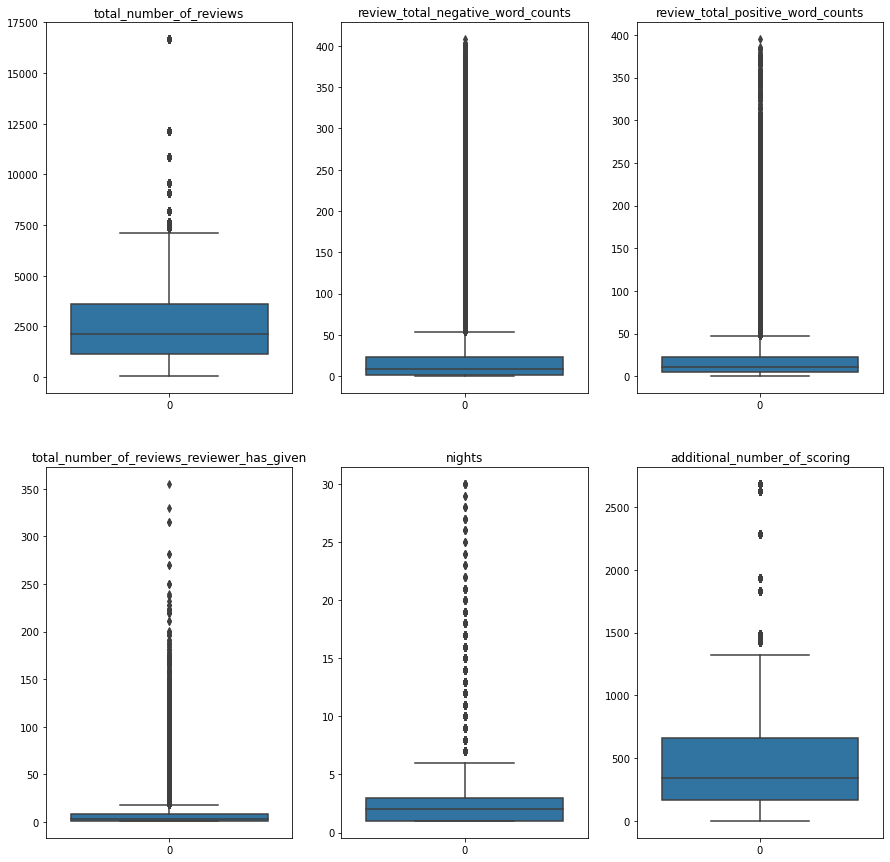

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

figure, axis = plt.subplots(2,3, figsize=(15,15))

sns.boxplot(data=hotels_cleaned['total_number_of_reviews'], ax=axis[0,0])
sns.boxplot(data=hotels_cleaned['review_total_negative_word_counts'], ax=axis[0,1])
sns.boxplot(data=hotels_cleaned['review_total_positive_word_counts'], ax=axis[0,2])
sns.boxplot(data=hotels_cleaned['total_number_of_reviews_reviewer_has_given'], ax=axis[1,0])
sns.boxplot(data=hotels_cleaned['nights'], ax=axis[1,1])
sns.boxplot(data=hotels_cleaned['additional_number_of_scoring'], ax=axis[1,2])

axis[0,0].set_title('total_number_of_reviews')
axis[0,1].set_title('review_total_negative_word_counts')
axis[0,2].set_title('review_total_positive_word_counts')
axis[1,0].set_title('total_number_of_reviews_reviewer_has_given')
axis[1,1].set_title('nights')
axis[1,2].set_title('additional_number_of_scoring')



Text(0.5, 1.0, 'additional_number_of_scoring')

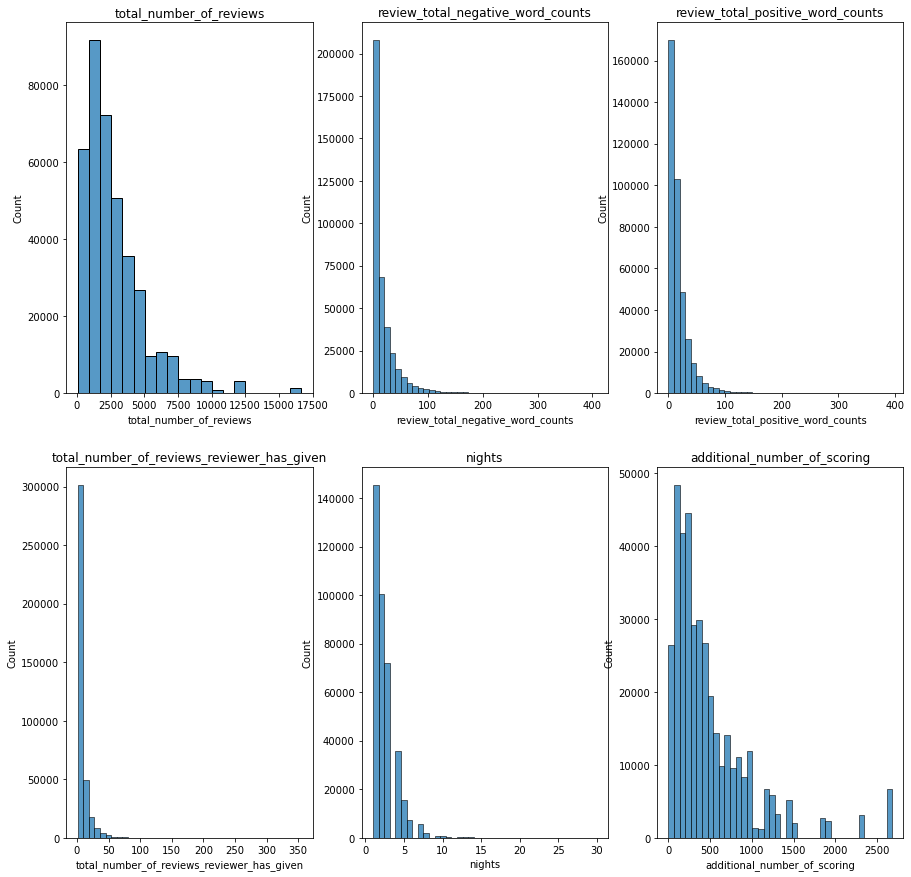

In [16]:
figure, axis = plt.subplots(2,3, figsize=(15,15))

sns.histplot(data=hotels_cleaned['total_number_of_reviews'], ax=axis[0,0], bins=20)
sns.histplot(data=hotels_cleaned['review_total_negative_word_counts'], ax=axis[0,1], bins=40)
sns.histplot(data=hotels_cleaned['review_total_positive_word_counts'], ax=axis[0,2], bins=40)
sns.histplot(data=hotels_cleaned['total_number_of_reviews_reviewer_has_given'], ax=axis[1,0], bins=40)
sns.histplot(data=hotels_cleaned['nights'], ax=axis[1,1], bins=40)
sns.histplot(data=hotels_cleaned['additional_number_of_scoring'], ax=axis[1,2], bins=40)

axis[0,0].set_title('total_number_of_reviews')
axis[0,1].set_title('review_total_negative_word_counts')
axis[0,2].set_title('review_total_positive_word_counts')
axis[1,0].set_title('total_number_of_reviews_reviewer_has_given')
axis[1,1].set_title('nights')
axis[1,2].set_title('additional_number_of_scoring')

#### Numerical data cleaning

In [17]:
def outliers_z_score(data, feature, logscale=False):
    
    if logscale:
        data_log = np.log(data[feature]+1)
    
    mean = data[feature].mean()
    sigma = data[feature].std()
    
    lower_bound = mean - 3*sigma
    upper_bound = mean + 3*sigma

    mask_cleaned = (data[feature] >= lower_bound) & (data[feature] <= upper_bound)
    mask_outliers = (data[feature] < lower_bound) & (data[feature] > upper_bound)

    cleaned = data[mask_cleaned]
    outliers = data[mask_outliers]
    
    return cleaned



In [18]:
hotels_cleaned = outliers_z_score(hotels_cleaned, 'total_number_of_reviews', logscale=True)
hotels_cleaned = outliers_z_score(hotels_cleaned, 'review_total_negative_word_counts', logscale=True)
hotels_cleaned = outliers_z_score(hotels_cleaned, 'review_total_positive_word_counts', logscale=True)
hotels_cleaned = outliers_z_score(hotels_cleaned, 'total_number_of_reviews_reviewer_has_given', logscale=True)
#hotels_cleaned = outliers_z_score(hotels_cleaned, 'nights', logscale=True)
hotels_cleaned = outliers_z_score(hotels_cleaned, 'additional_number_of_scoring', logscale=True)

Text(0.5, 1.0, 'additional_number_of_scoring')

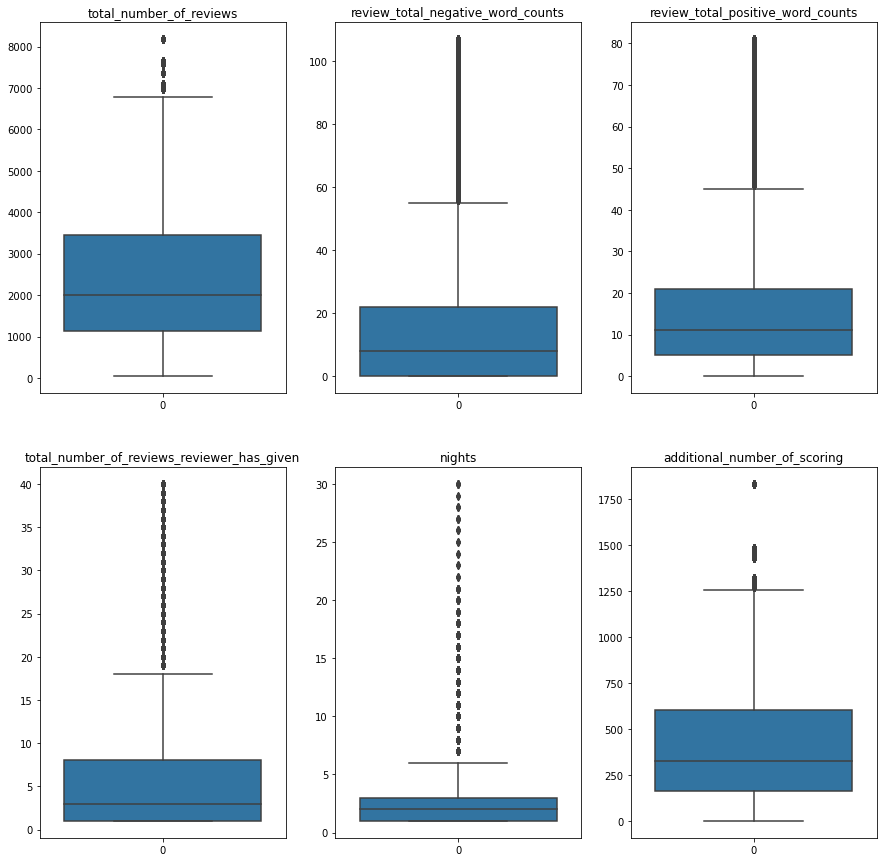

In [19]:
figure, axis = plt.subplots(2,3, figsize=(15,15))

sns.boxplot(data=hotels_cleaned['total_number_of_reviews'], ax=axis[0,0])
sns.boxplot(data=hotels_cleaned['review_total_negative_word_counts'], ax=axis[0,1])
sns.boxplot(data=hotels_cleaned['review_total_positive_word_counts'], ax=axis[0,2])
sns.boxplot(data=hotels_cleaned['total_number_of_reviews_reviewer_has_given'], ax=axis[1,0])
sns.boxplot(data=hotels_cleaned['nights'], ax=axis[1,1])
sns.boxplot(data=hotels_cleaned['additional_number_of_scoring'], ax=axis[1,2])

axis[0,0].set_title('total_number_of_reviews')
axis[0,1].set_title('review_total_negative_word_counts')
axis[0,2].set_title('review_total_positive_word_counts')
axis[1,0].set_title('total_number_of_reviews_reviewer_has_given')
axis[1,1].set_title('nights')
axis[1,2].set_title('additional_number_of_scoring')

In [47]:
def outliers_iqr(data, feature, lower_q=1.5, upper_q=1.5):
    
    quartile_1, quartile_3 = data[feature].quantile(0.25), data[feature].quantile(0.75)
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (lower_q*iqr)
    upper_bound = quartile_3 + (upper_q*iqr)
    
    mask_cleaned = (data[feature] >= lower_bound) & (data[feature] <= upper_bound)
    mask_outliers = (data[feature] < lower_bound) & (data[feature] > upper_bound)

    cleaned = data[mask_cleaned]
    outliers = data[mask_outliers]
    
    return cleaned

In [48]:
hotels_cleaned_iqr = hotels_cleaned.copy()

hotels_cleaned_iqr = outliers_iqr(hotels_cleaned, 'total_number_of_reviews')
hotels_cleaned_iqr = outliers_iqr(hotels_cleaned_iqr, 'review_total_negative_word_counts')
hotels_cleaned_iqr = outliers_iqr(hotels_cleaned_iqr, 'review_total_positive_word_counts')
hotels_cleaned_iqr = outliers_iqr(hotels_cleaned_iqr, 'total_number_of_reviews_reviewer_has_given')
hotels_cleaned_iqr = outliers_iqr(hotels_cleaned_iqr, 'nights')
hotels_cleaned_iqr = outliers_iqr(hotels_cleaned_iqr, 'additional_number_of_scoring')

Text(0.5, 1.0, 'additional_number_of_scoring')

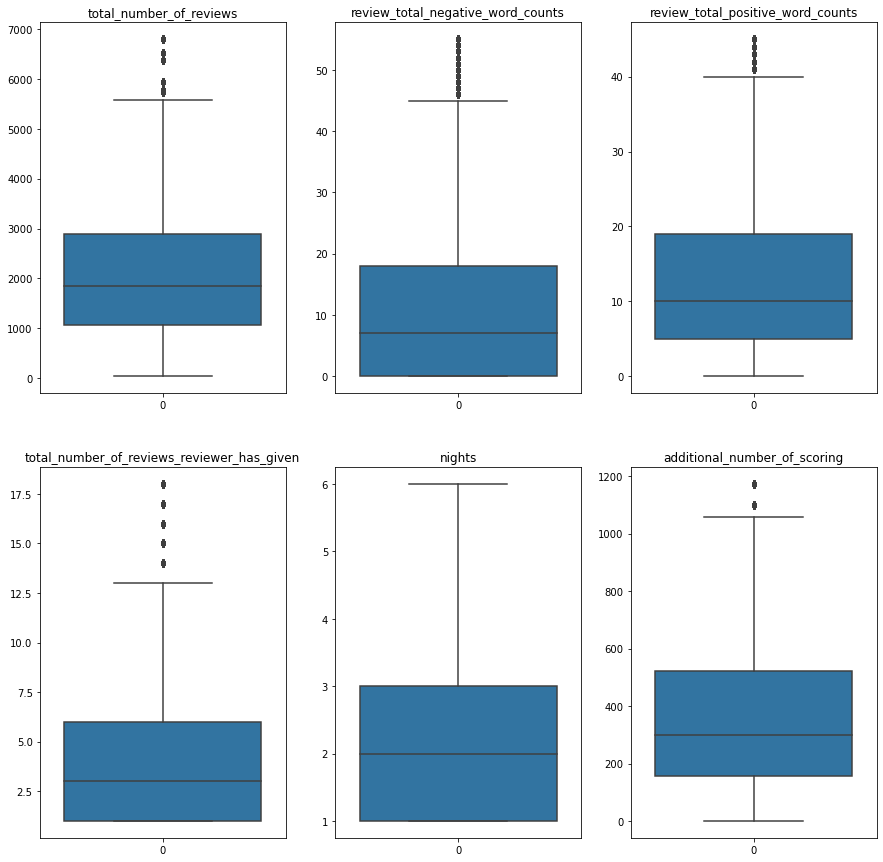

In [50]:
figure, axis = plt.subplots(2,3, figsize=(15,15))

sns.boxplot(data=hotels_cleaned_iqr['total_number_of_reviews'], ax=axis[0,0])
sns.boxplot(data=hotels_cleaned_iqr['review_total_negative_word_counts'], ax=axis[0,1])
sns.boxplot(data=hotels_cleaned_iqr['review_total_positive_word_counts'], ax=axis[0,2])
sns.boxplot(data=hotels_cleaned_iqr['total_number_of_reviews_reviewer_has_given'], ax=axis[1,0])
sns.boxplot(data=hotels_cleaned_iqr['nights'], ax=axis[1,1])
sns.boxplot(data=hotels_cleaned_iqr['additional_number_of_scoring'], ax=axis[1,2])

axis[0,0].set_title('total_number_of_reviews')
axis[0,1].set_title('review_total_negative_word_counts')
axis[0,2].set_title('review_total_positive_word_counts')
axis[1,0].set_title('total_number_of_reviews_reviewer_has_given')
axis[1,1].set_title('nights')
axis[1,2].set_title('additional_number_of_scoring')

In [21]:
hotels_cleaned_outliers = hotels_cleaned.copy()

In [22]:
hotels_cleaned_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 351176 entries, 0 to 386802
Data columns (total 12 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   additional_number_of_scoring                351176 non-null  int64  
 1   average_score                               351176 non-null  float64
 2   reviewer_nationality                        351176 non-null  object 
 3   review_total_negative_word_counts           351176 non-null  int64  
 4   total_number_of_reviews                     351176 non-null  int64  
 5   review_total_positive_word_counts           351176 non-null  int64  
 6   total_number_of_reviews_reviewer_has_given  351176 non-null  int64  
 7   reviewer_score                              351176 non-null  float64
 8   lat                                         351176 non-null  float64
 9   lng                                         351176 non-null  float64
 

#### Categorial data encoding

In [23]:
import category_encoders as ce

bin_encoder = ce.BinaryEncoder(cols=['reviewer_nationality'])
type_bin = bin_encoder.fit_transform(hotels_cleaned_outliers['reviewer_nationality'])
hotels_encoded = pd.concat([hotels_cleaned_outliers, type_bin], axis=1)
hotels_encoded = hotels_encoded.drop(columns=['reviewer_nationality'], axis=1)


#### Test for correlations

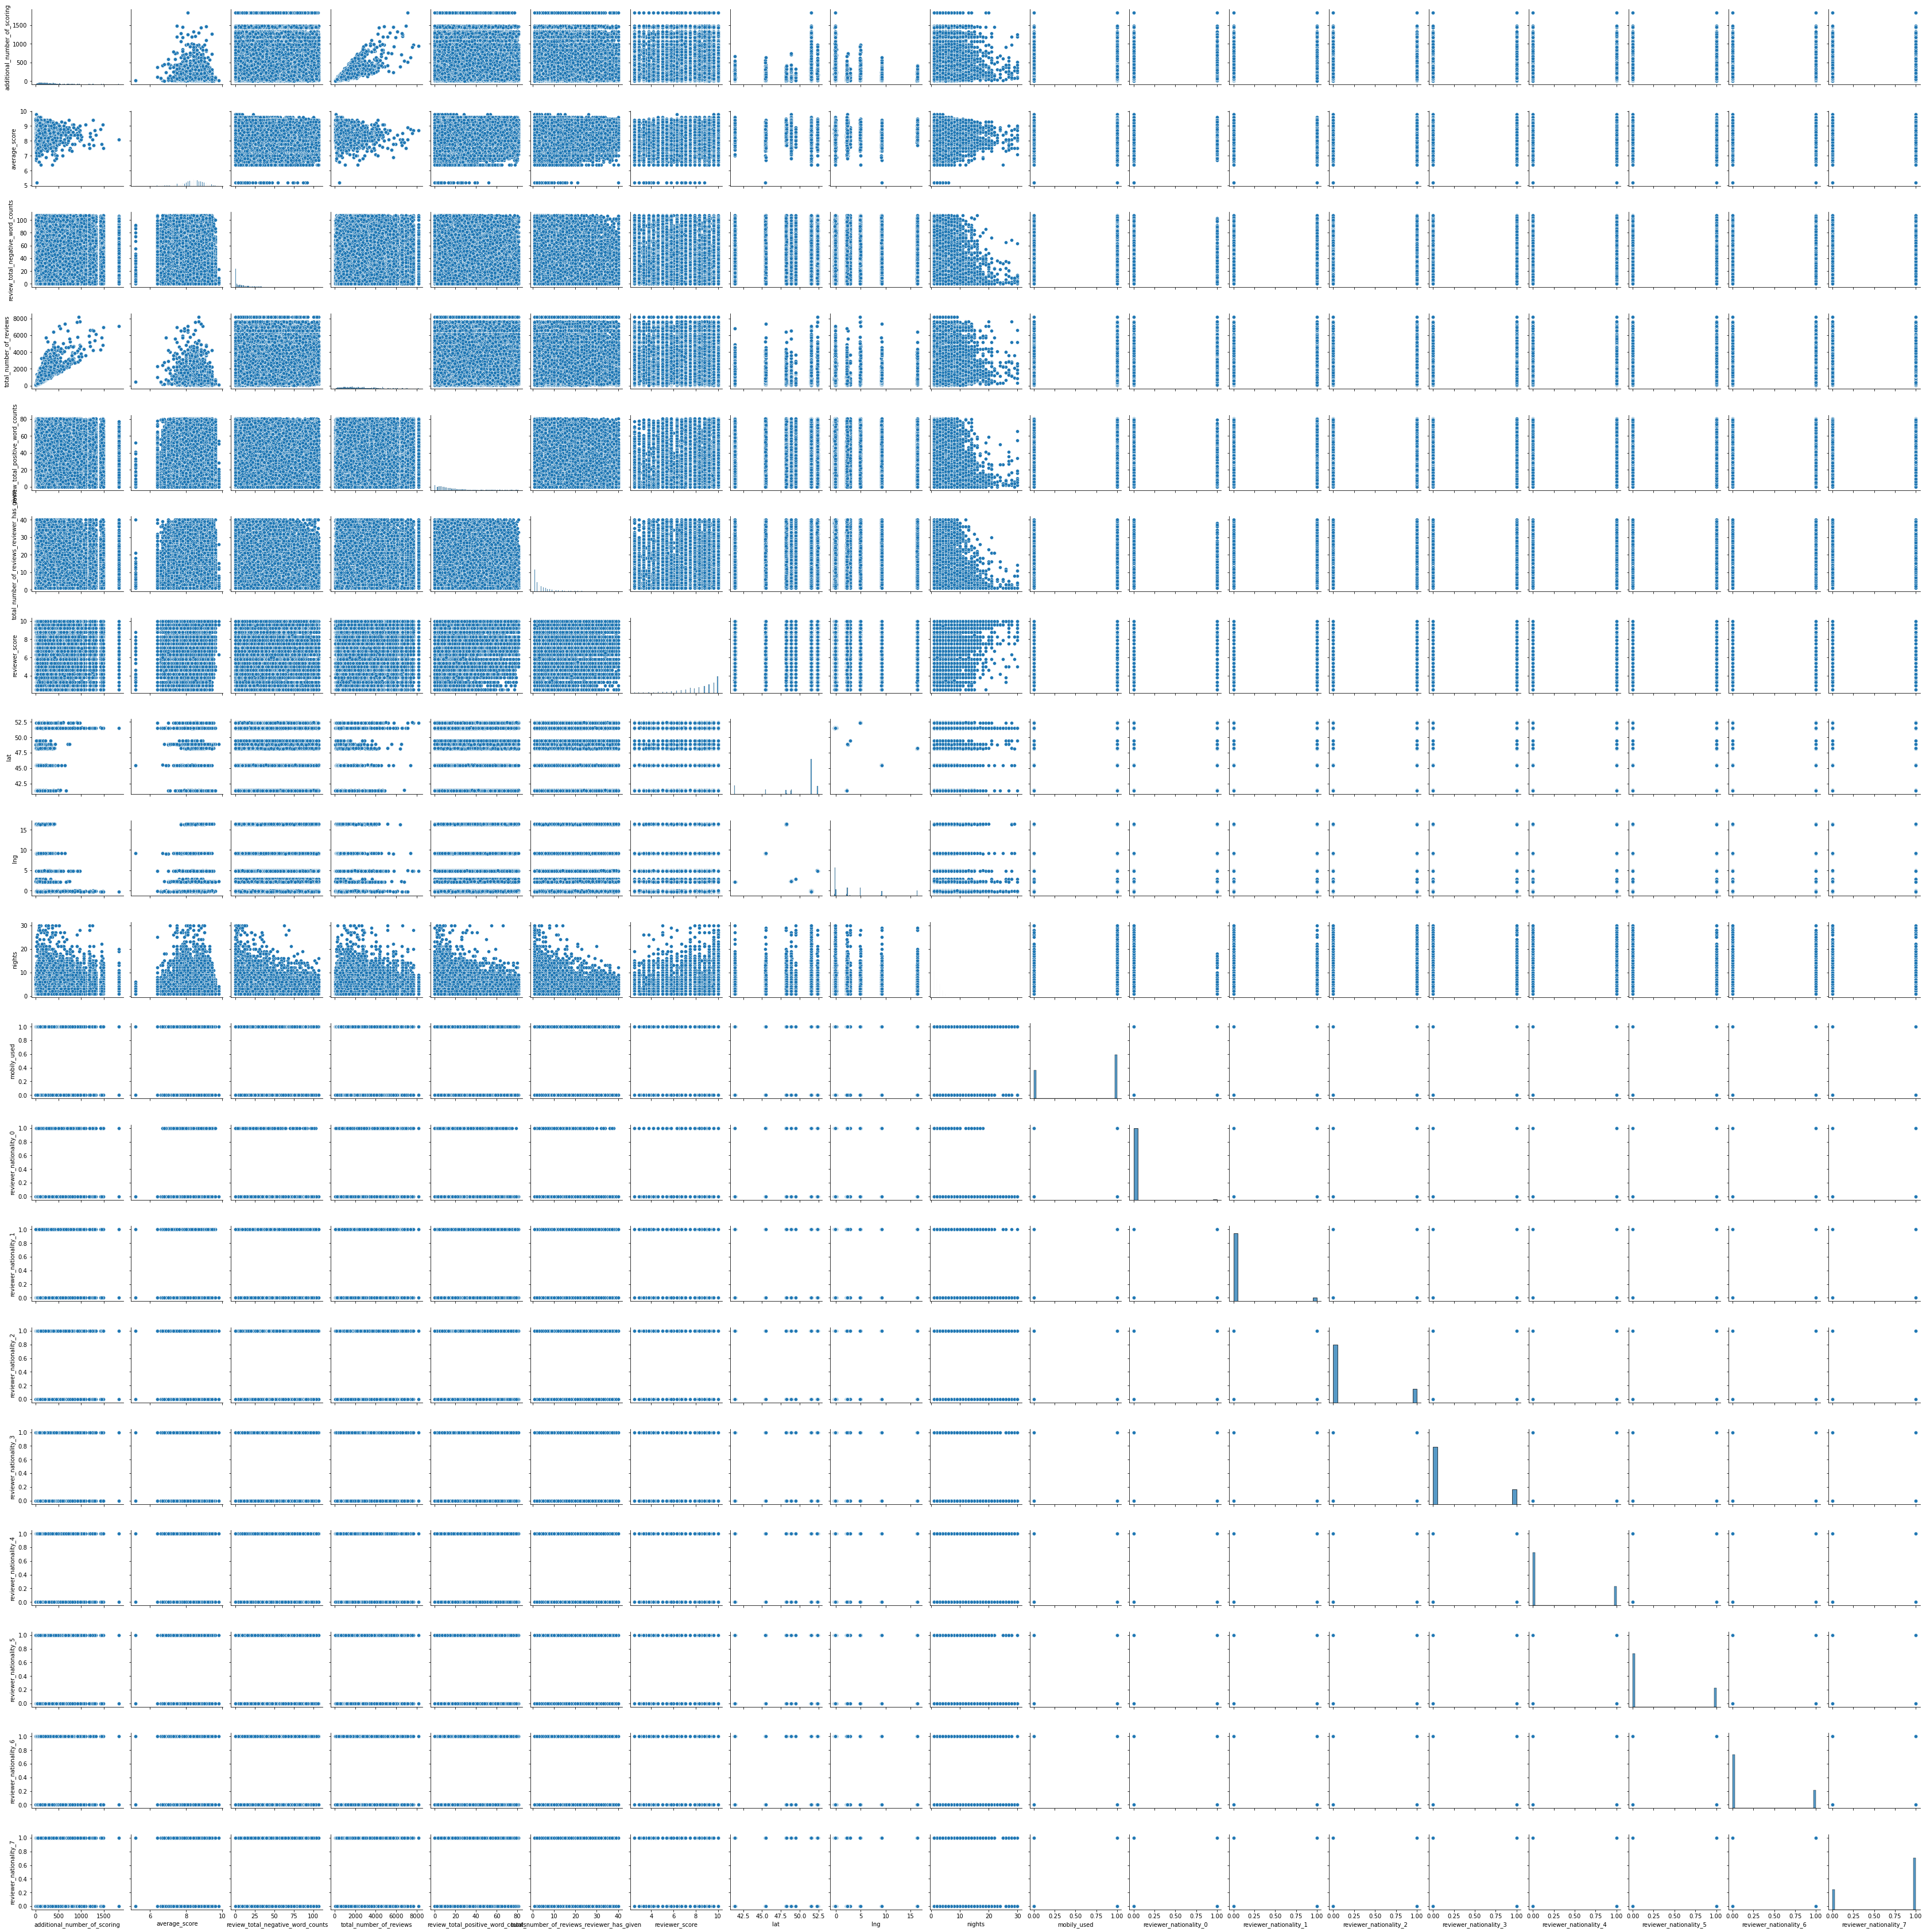

In [24]:
sns.pairplot(data=hotels_encoded)

<AxesSubplot:>

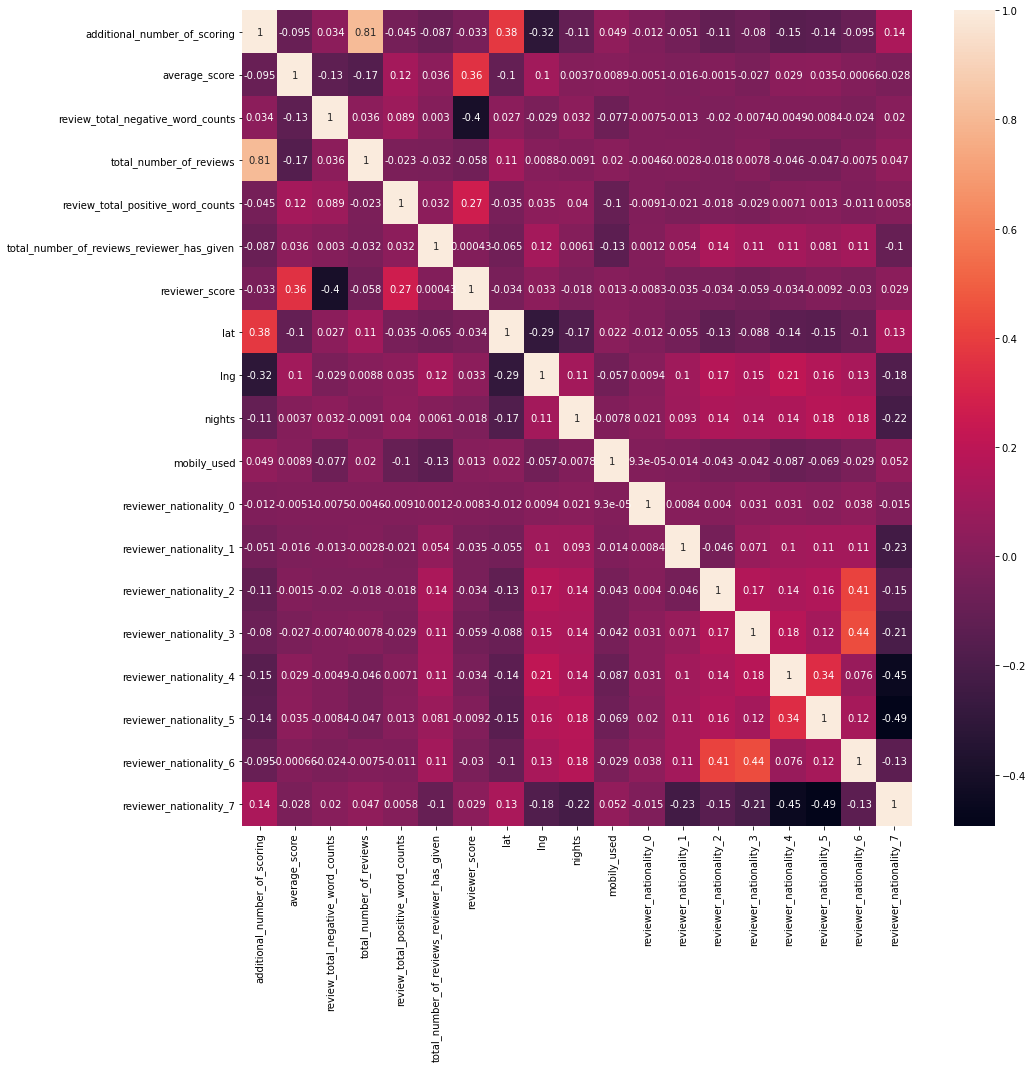

In [25]:
figure = plt.figure(figsize=(15,15))

sns.heatmap(data=hotels_encoded.corr(), annot=True)

#### Test for data correspondence

In [26]:
hotels_encoded[cat_cols_1].describe()

,average_score,additional_number_of_scoring,lat,lng,mobily_used
count,351176.000000,351176.000000,351176.000000,351176.000000,351176.000000
mean,8.408148,435.595496,49.415854,2.846903,0.606533
std,0.541083,362.972429,3.482863,4.572996,0.488519
min,5.200000,1.000000,41.328376,-0.369758,0.000000
25%,8.100000,164.000000,48.214662,-0.145420,0.000000
50%,8.400000,329.000000,51.499046,2.101884,1.000000
75%,8.800000,602.000000,51.517167,4.831098,1.000000
max,9.800000,1831.000000,52.400181,16.429233,1.000000


In [27]:
X = hotels_encoded.drop(['reviewer_score'], axis = 1)  
y = hotels_encoded['reviewer_score']  

In [28]:
cat_cols_1 = ['average_score',
            'lat',
            'mobily_used']

<AxesSubplot:>

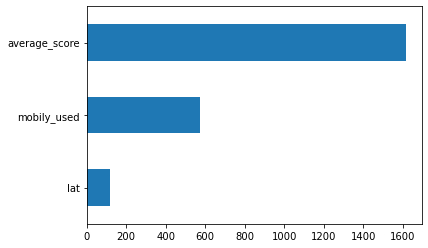

In [29]:
from sklearn.feature_selection import chi2 # хи-квадрат

y=y.astype('int')

imp_cat = pd.Series(chi2(X[cat_cols_1], y)[0], index=cat_cols_1)
imp_cat.sort_values(inplace = True)
imp_cat.plot(kind = 'barh')

In [ ]:
from sklearn.feature_selection import chi2 # хи-квадрат

y=y.astype('int')

imp_cat = pd.Series(chi2(X[cat_cols], y)[0], index=cat_cols_1)
imp_cat.sort_values(inplace = True)
imp_cat.plot(kind = 'barh')

In [30]:
num_cols =['total_number_of_reviews',
           'review_total_negative_word_counts',
           'review_total_positive_word_counts',
           'total_number_of_reviews_reviewer_has_given',
           'nights',
           'additional_number_of_scoring']

In [31]:
hotels_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 351176 entries, 0 to 386802
Data columns (total 19 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   additional_number_of_scoring                351176 non-null  int64  
 1   average_score                               351176 non-null  float64
 2   review_total_negative_word_counts           351176 non-null  int64  
 3   total_number_of_reviews                     351176 non-null  int64  
 4   review_total_positive_word_counts           351176 non-null  int64  
 5   total_number_of_reviews_reviewer_has_given  351176 non-null  int64  
 6   reviewer_score                              351176 non-null  float64
 7   lat                                         351176 non-null  float64
 8   lng                                         351176 non-null  float64
 9   nights                                      351176 non-null  float64
 

In [45]:
num_cols_2 = (X.dtypes == 'int').index
print(num_cols_2)

Index(['additional_number_of_scoring', 'average_score',
       'review_total_negative_word_counts', 'total_number_of_reviews',
       'review_total_positive_word_counts',
       'total_number_of_reviews_reviewer_has_given', 'nights'],
      dtype='object')


<AxesSubplot:>

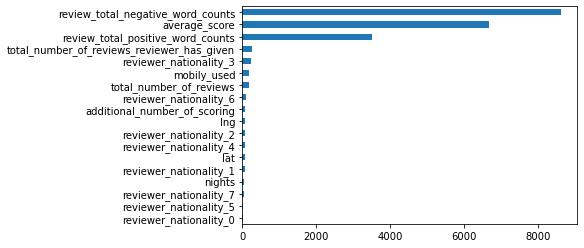

In [33]:
from sklearn.feature_selection import f_classif # anova

imp_num = pd.Series(f_classif(X[num_cols_2], y)[0], index = num_cols_2)
imp_num.sort_values(inplace = True)
imp_num.plot(kind = 'barh')

#### Machine Learing

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.25, random_state=42)

regr = RandomForestRegressor(n_estimators=100)  
      
regr.fit(X_tr, y_tr)  

y_pred = regr.predict(X_te)

print('MAPE:', metrics.mean_absolute_percentage_error(y_te, y_pred))

MAPE: 0.16108178730564288


In [ ]:
hotels_cleaned_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 351176 entries, 0 to 386802
Data columns (total 12 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   additional_number_of_scoring                351176 non-null  int64  
 1   average_score                               351176 non-null  float64
 2   reviewer_nationality                        351176 non-null  object 
 3   review_total_negative_word_counts           351176 non-null  int64  
 4   total_number_of_reviews                     351176 non-null  int64  
 5   review_total_positive_word_counts           351176 non-null  int64  
 6   total_number_of_reviews_reviewer_has_given  351176 non-null  int64  
 7   reviewer_score                              351176 non-null  float64
 8   lat                                         351176 non-null  float64
 9   lng                                         351176 non-null  float64
 

In [53]:
test = hotels_cleaned_iqr.drop(columns=['reviewer_nationality'], axis=1)

<AxesSubplot:>

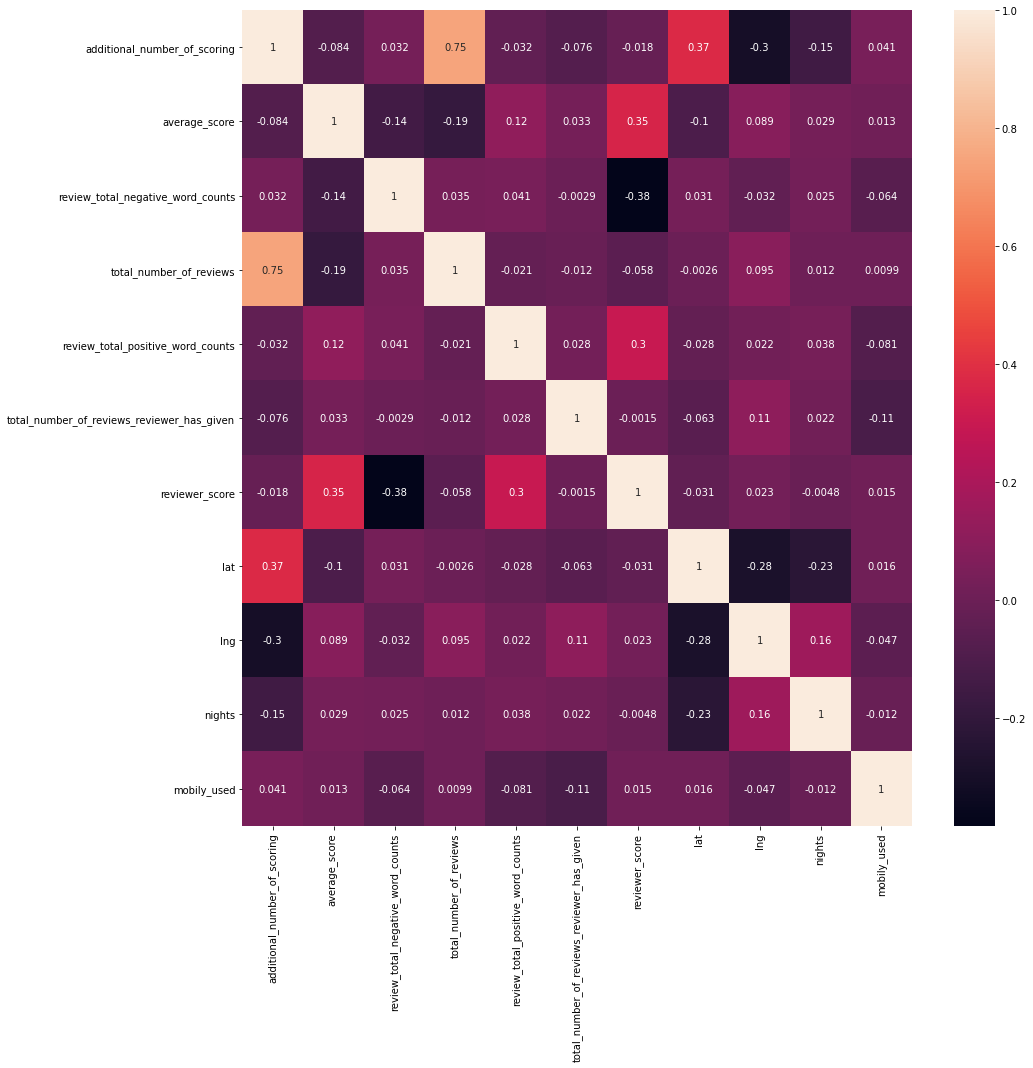

In [54]:
figure = plt.figure(figsize=(15,15))

sns.heatmap(data=test.corr(), annot=True)

In [55]:
test = test.drop(columns=['lat', 'lng'], axis=1)

X = test.drop(['reviewer_score'], axis = 1)  
y = test['reviewer_score']

X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.25, random_state=42)

regr = RandomForestRegressor(n_estimators=100)  
      
regr.fit(X_tr, y_tr)  

y_pred = regr.predict(X_te)

print('MAPE:', metrics.mean_absolute_percentage_error(y_te, y_pred))

MAPE: 0.13644554556538285
